In [70]:
import numpy as np

### Напишіть функцію гіпотези лінійної регресії у векторному вигляді:

In [71]:
def h(w_0, w_1, x):
    theta = np.array([w_0, w_1])
    x_vector = np.array([1, x])
    return np.dot(theta, x_vector)

### Створіть функцію для обчислення функції втрат у векторному вигляді:

In [72]:
def compute_cost(theta, X, y):
    m = len(y)
    predictions = np.dot(X, theta)
    cost = np.sum((predictions - y)**2) / (2 * m)
    return cost

### Реалізуйте один крок градієнтного спуску:

In [73]:
def gradient_descent_step(theta, X, y, learning_rate):
    m = len(y)
    predictions = np.dot(X, theta)
    errors = predictions - y
    gradient = (1 / m) * np.dot(X.T, errors)
    new_theta = theta - learning_rate * gradient
    return new_theta

### Знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень:

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/drive/MyDrive/Data_science/hw_03/Housing.csv')

X = data[['area', 'bedrooms', 'bathrooms']]
y = data['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = np.column_stack((np.ones(len(X_scaled)), X_scaled))

learning_rate = 0.001
num_iterations = 10000

def gradient_descent(X, y, learning_rate, num_iterations):
    m, n = X.shape
    w = np.random.rand(n)

    for _ in range(num_iterations):
        predictions = np.dot(X, w)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        w -= learning_rate * gradient

    return w

optimal_w = gradient_descent(X_normalized, y, learning_rate, num_iterations)

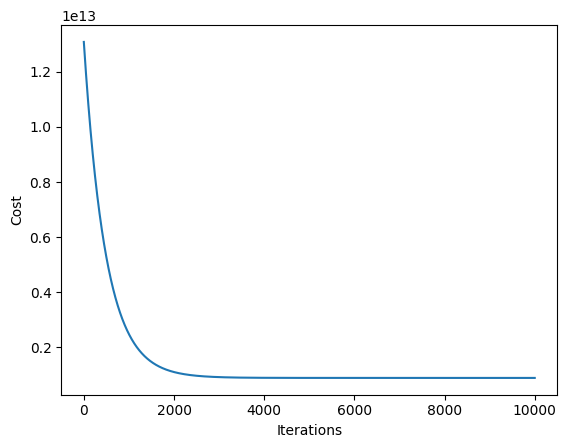

In [76]:
import matplotlib.pyplot as plt

def compute_cost(X, y, w):
    m = len(y)
    predictions = np.dot(X, w)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

def gradient_descent_with_cost(X, y, learning_rate, num_iterations):
    m, n = X.shape
    w = np.random.rand(n)
    costs = []

    for _ in range(num_iterations):
        predictions = np.dot(X, w)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        w -= learning_rate * gradient

        cost = compute_cost(X, y, w)
        costs.append(cost)

    return w, costs

optimal_w, costs = gradient_descent_with_cost(X_normalized, y, learning_rate, num_iterations)

plt.plot(range(num_iterations), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

### Знайдіть ці ж параметри за допомогою аналітичного рішення:

In [77]:
def analytical_solution(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

### Порівняйте отримані результати:

In [79]:
optimal_w_gradient = gradient_descent(X_normalized, y, learning_rate, num_iterations)
optimal_w_analytical = analytical_solution(X_normalized, y)

print("Optimal_w_gradient:", optimal_w_gradient)
print("Optimal_w_analytical:", optimal_w_analytical)


Optimal_w_gradient: [4766513.91860524  821197.96125139  300302.25421426  695511.07708483]
Optimal_w_analytical: [4766729.24770642  821214.14349519  299983.57107963  695808.52272538]
